In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

# Census

## Original TGAN

In [15]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan.csv', real_sep=',')
tgan_evaluator = DataEvaluator(real, fake)

In [16]:
tgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: kendalltau


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.9268 0.9357
real_data_LogisticRegression_F1     0.9453 0.9392
real_data_RandomForestClassifier_F1 0.9500 0.9359
real_data_DecisionTreeClassifier_F1 0.9290 0.8832
real_data_MLPClassifier_F1          0.9501 0.9353
fake_data_SGDClassifier_F1          0.9370 0.9465
fake_data_LogisticRegression_F1     0.9598 0.9609
fake_data_RandomForestClassifier_F1 0.9576 0.9608
fake_data_DecisionTreeClassifier_F1 0.9279 0.9313
fake_data_MLPClassifier_F1          0.9557 0.9573

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.0652
Column Correlation distance MAE      0.0300
Duplicate data between sets      9,252.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9003
Correlation column correlations                 0.7456

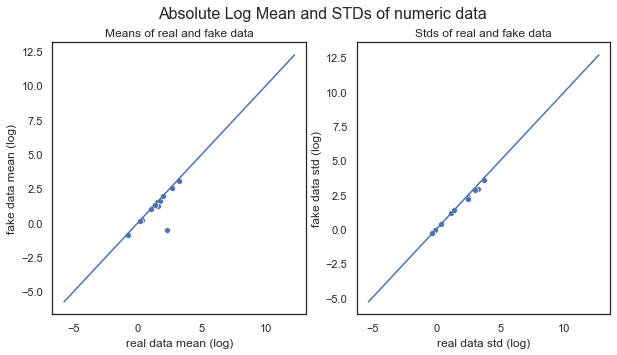

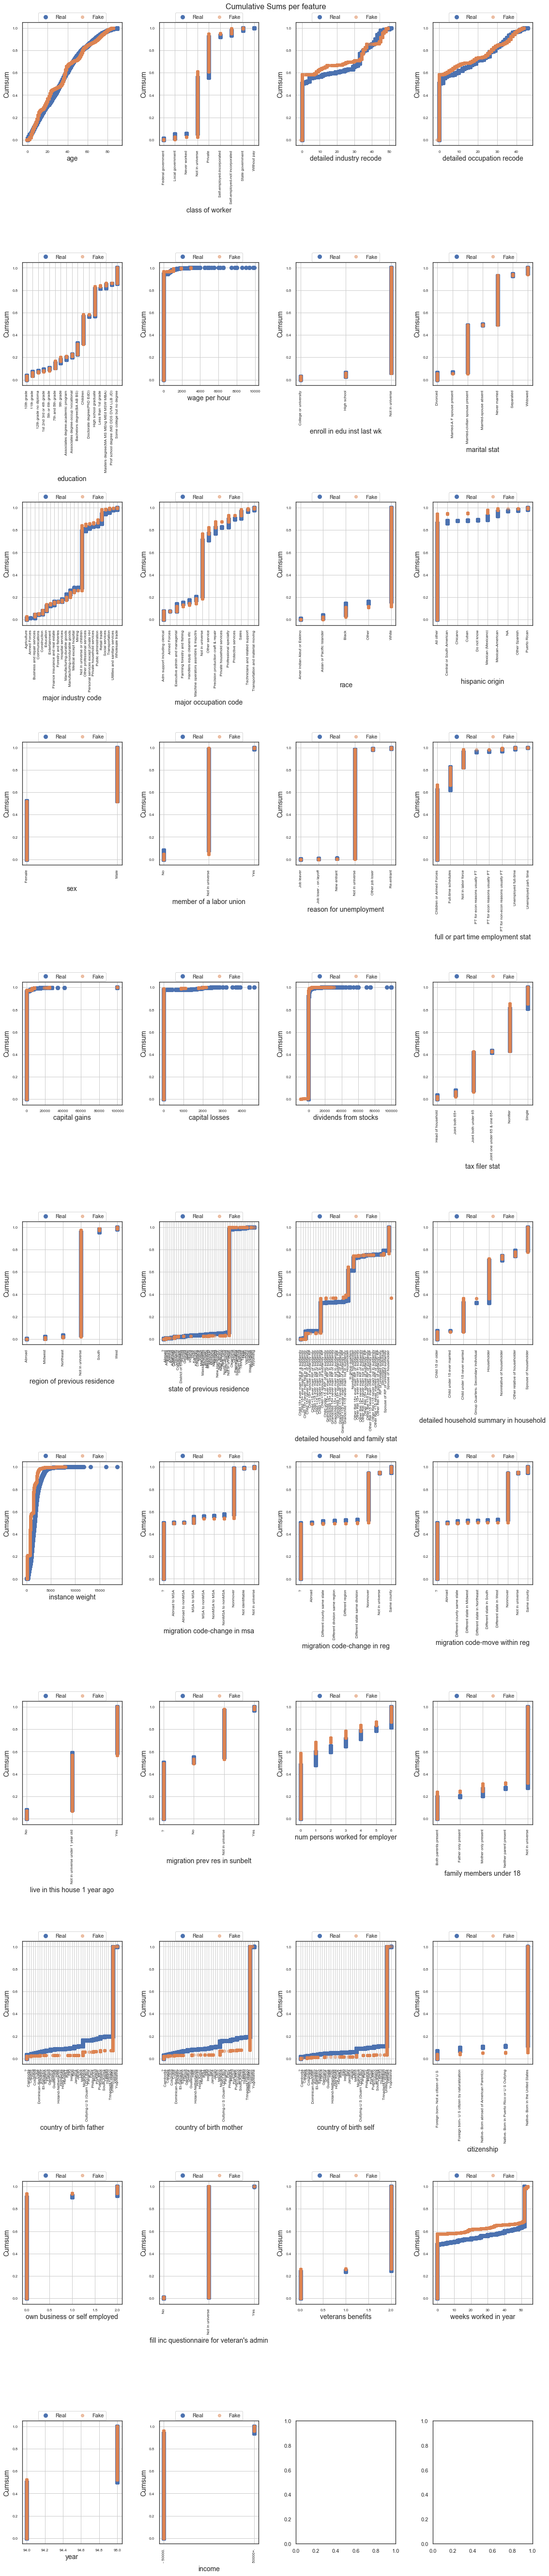

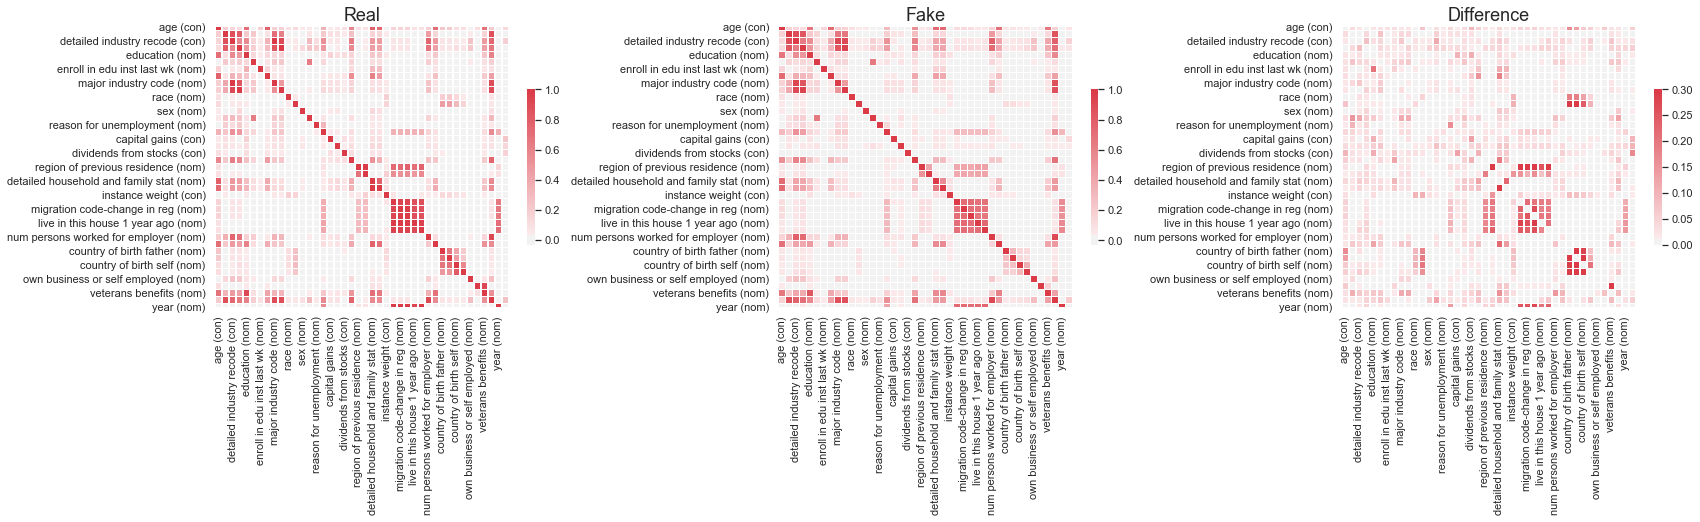

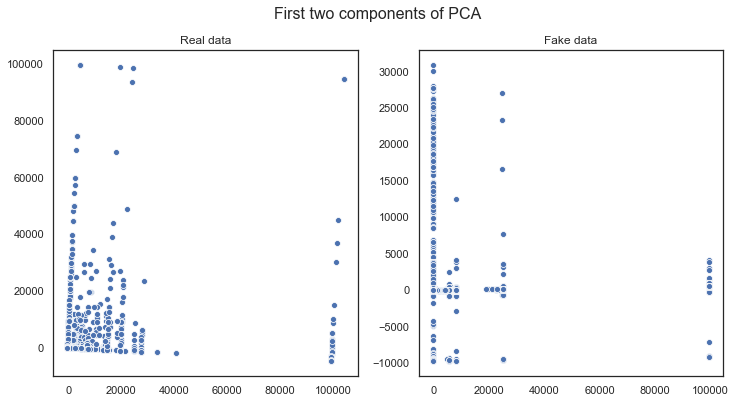

In [17]:
tgan_evaluator.visual_evaluation(annot=False)

## WGAN-GP Fixed

In [18]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-wgan-gp.csv', real_sep=',')
wgan_evaluator = DataEvaluator(real, fake)

In [19]:
wgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: kendalltau


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.9009 0.9393
real_data_LogisticRegression_F1     0.9488 0.9434
real_data_RandomForestClassifier_F1 0.9505 0.9409
real_data_DecisionTreeClassifier_F1 0.9345 0.8976
real_data_MLPClassifier_F1          0.9544 0.9374
fake_data_SGDClassifier_F1          0.8860 0.9280
fake_data_LogisticRegression_F1     0.9270 0.9285
fake_data_RandomForestClassifier_F1 0.9260 0.9298
fake_data_DecisionTreeClassifier_F1 0.8930 0.8957
fake_data_MLPClassifier_F1          0.9284 0.9312

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.0413
Column Correlation distance MAE      0.0198
Duplicate data between sets      2,231.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9675
Correlation column correlations                 0.7971

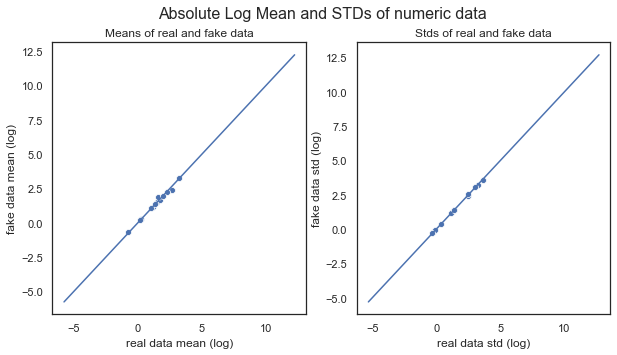

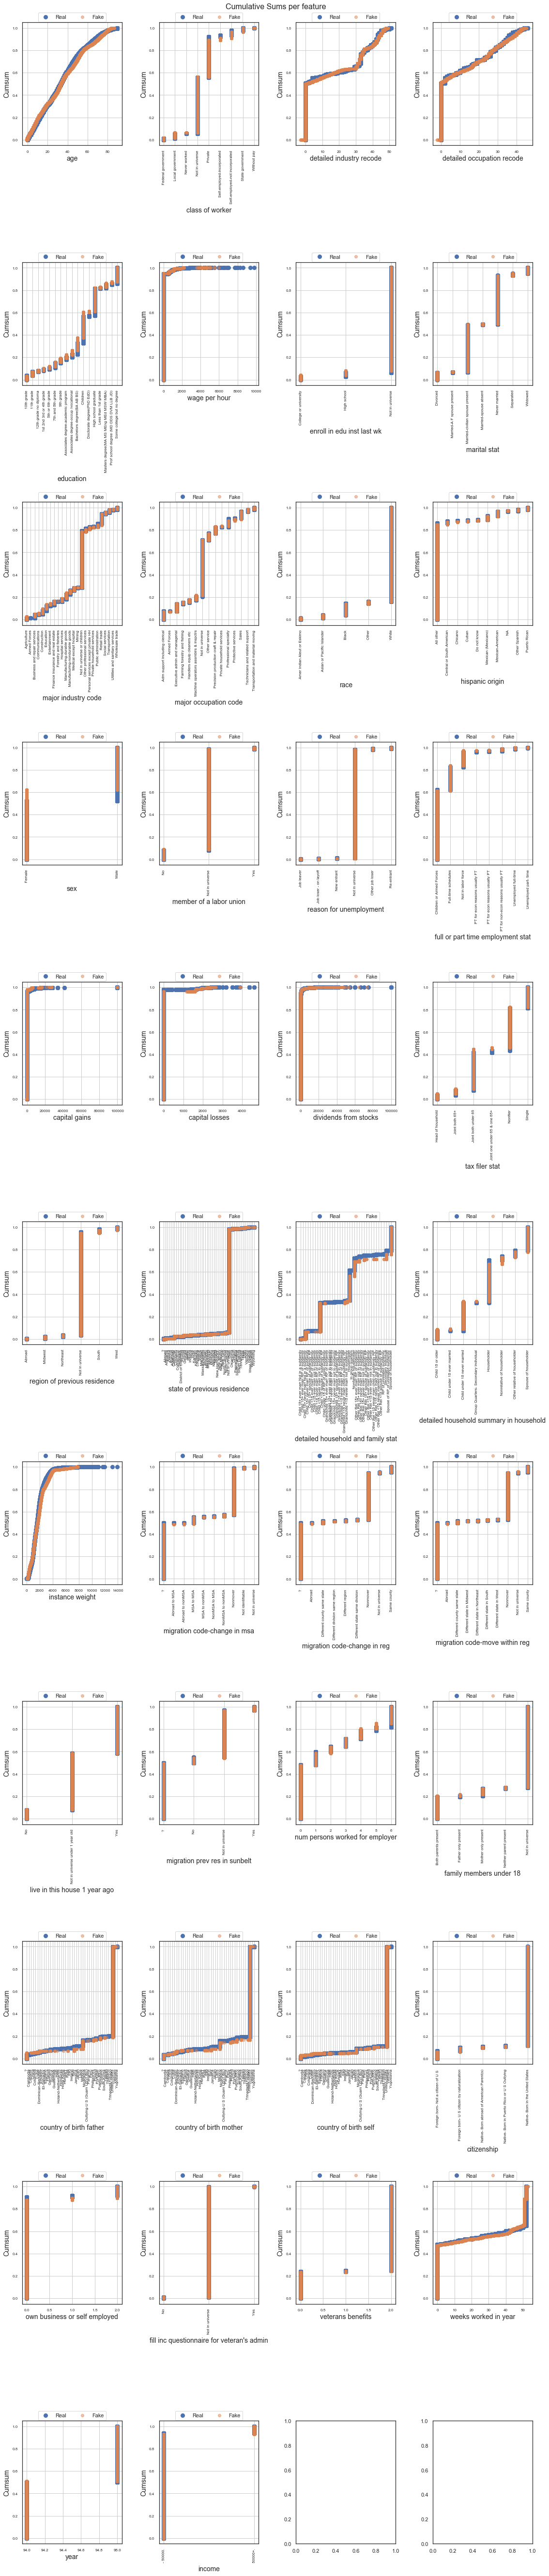

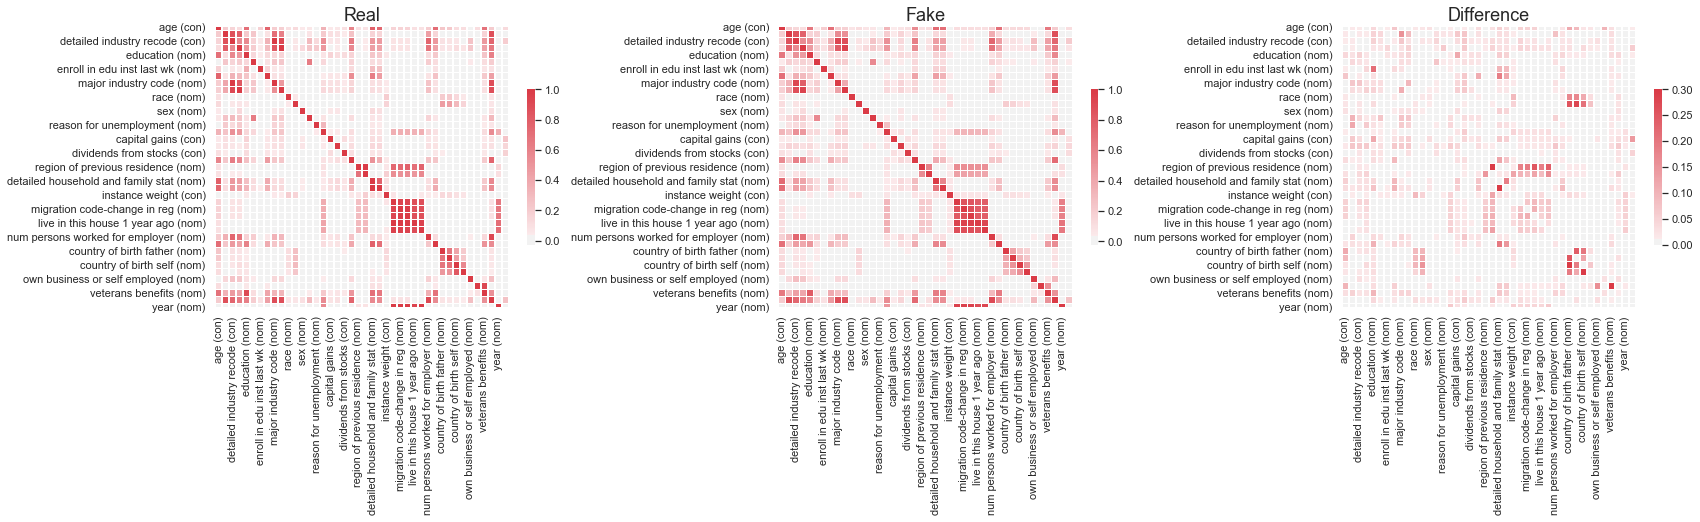

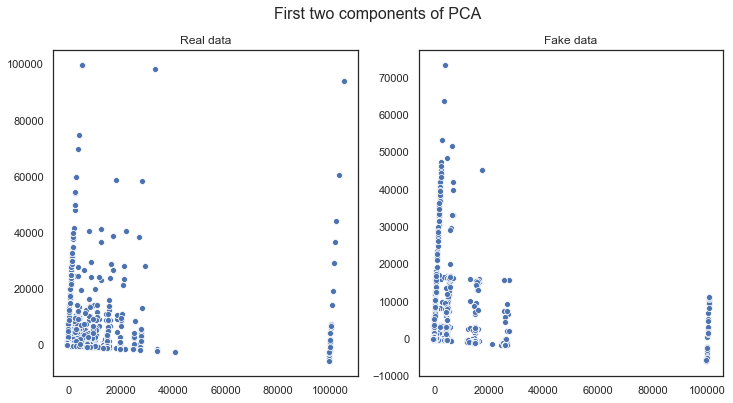

In [20]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [21]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/census_sample_tgan-skip-connections-columns-corrected.csv', real_sep=',', fake_sep=';')
skip_evaluator = DataEvaluator(real, fake)

In [22]:
skip_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: kendalltau


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_SGDClassifier_F1          0.9183 0.7330
real_data_LogisticRegression_F1     0.9483 0.9394
real_data_RandomForestClassifier_F1 0.9503 0.9379
real_data_DecisionTreeClassifier_F1 0.9313 0.8878
real_data_MLPClassifier_F1          0.9510 0.9381
fake_data_SGDClassifier_F1          0.8840 0.6823
fake_data_LogisticRegression_F1     0.9241 0.9274
fake_data_RandomForestClassifier_F1 0.9254 0.9272
fake_data_DecisionTreeClassifier_F1 0.8899 0.8800
fake_data_MLPClassifier_F1          0.9083 0.9275

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.1031
Column Correlation distance MAE      0.0493
Duplicate data between sets      2,647.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9474
Correlation column correlations                 0.6749

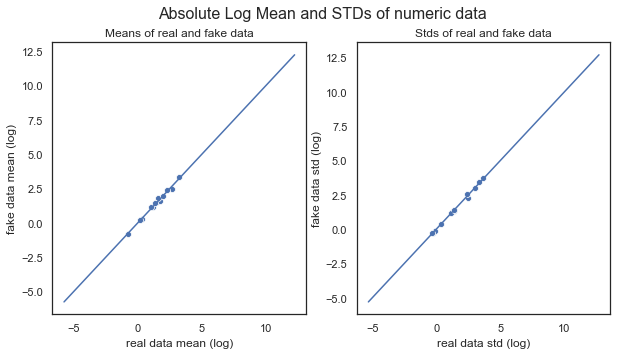

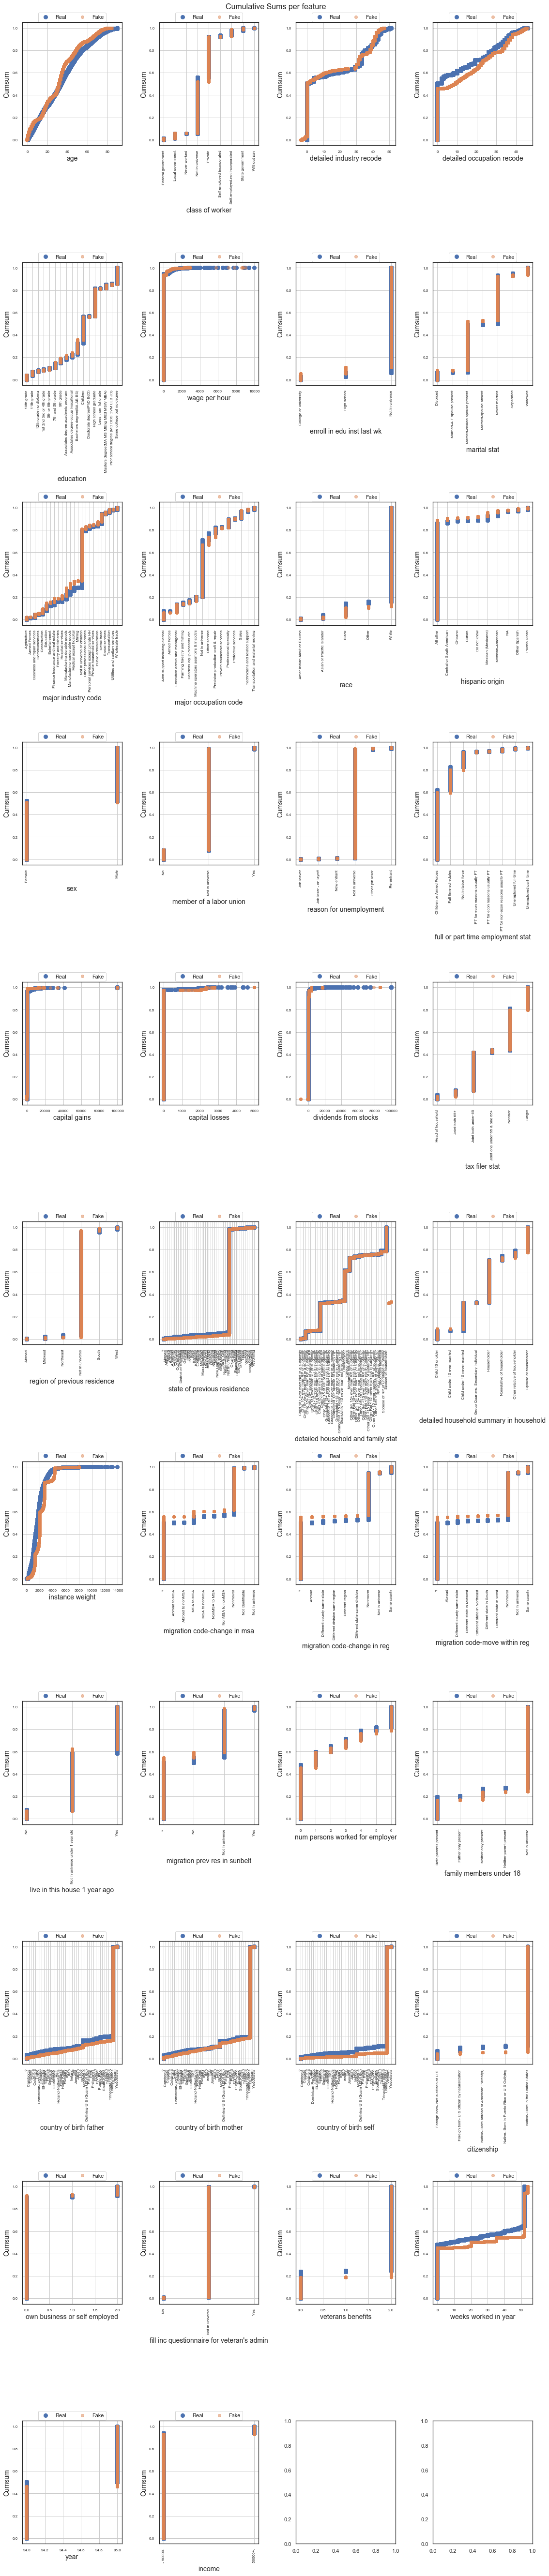

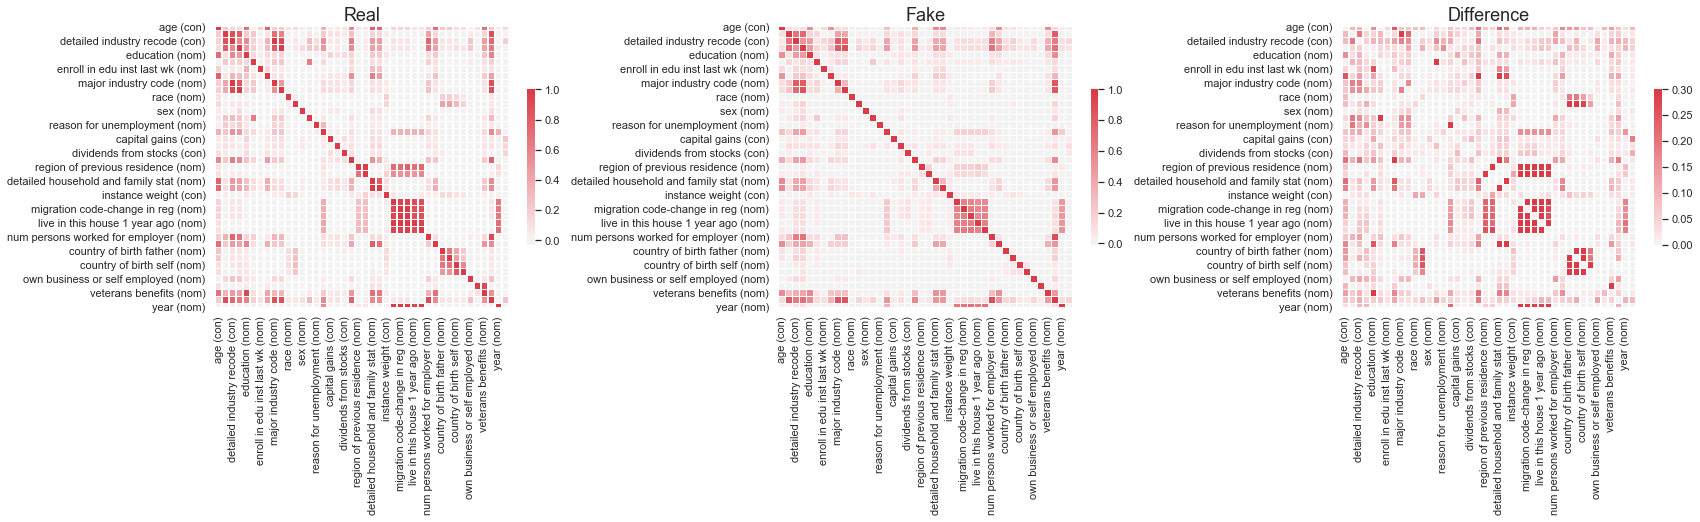

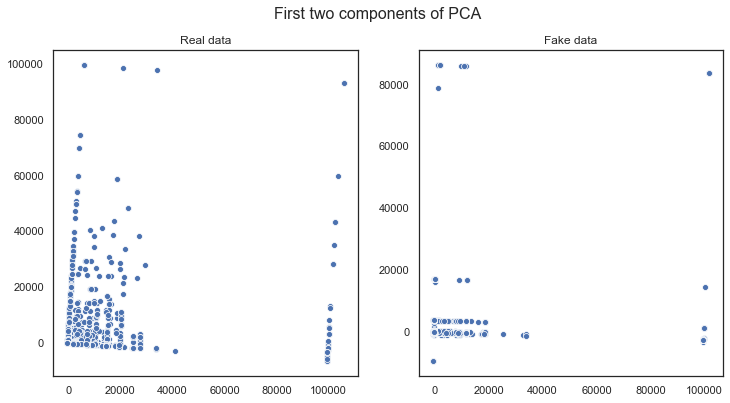

In [23]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [24]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_medgan_100.csv', real_sep=',')
medgan_evaluator = DataEvaluator(real, fake)

In [25]:
medgan_evaluator.evaluate(target_col='income', verbose=False)


Correlation metric: kendalltau


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [ ]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [ ]:
real, fake = get_data('../data/census/census_cat.csv', '../final_data/census/sample_census_tablegan_100.csv', real_sep=',')
tablegan_evaluator = DataEvaluator(real, fake)

In [ ]:
tablegan_evaluator.evaluate(target_col='income', verbose=False)

In [ ]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [27]:
target_col = 'income'
x = numerical_encoding(tgan_evaluator.fake.drop([target_col], axis=1), nominal_columns=tgan_evaluator.categorical_columns)

IndexError: index 361 is out of bounds for axis 0 with size 349

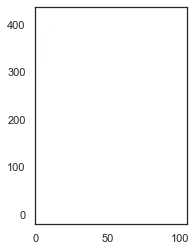

In [30]:
feature_importance = tgan_evaluator.r_estimators[2].feature_importances_
# print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
# print(column_names)
# print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

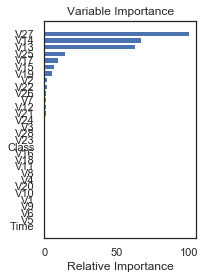

In [72]:
feature_importance = tgan_org_evaluator.r_estimators[0].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()